<a href="https://colab.research.google.com/github/Joaquin-Flores04/Portafolio/blob/main/Examen_definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uso de la api del Banco Mundial

La versión `1.0.12` del paquete wbgapi de python ya está disponible. Este paquete

In [5]:
%pip install wbgapi

In [6]:
import wbgapi as wb
import pandas as pd
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Examen ciencia de datos')

import my_func as fn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Usando la API del banco Mundial es posible aceder a estadísticas diversas sobre desarrollo económico. A continuación extraeremos informacion de 65 indicadores económicos

In [7]:
# Indicadores a consultar
dicc_indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [8]:
#Descargar datos
paises_wb_raw = fn.descargar_en_chunks(indicadores= dicc_indicadores_wb, años = 2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

##Analisis exploratorio de datos

In [9]:
paises_wb_raw.tail()

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
261,CEB,Central Europe and the Baltics,4.218704e+12,45.670155,49100893.0,0.111693,100183707.0,51639515.0,51.544825,48544192.0,...,80.939987,56.712559,81.624607,77.896625,74.354109,100.000000,100.000000,NaN,NaN,NaN
262,CSS,Caribbean small states,1.338577e+11,43.965332,1919128.0,0.501131,4519904.0,2293907.0,50.751230,2225997.0,...,NaN,NaN,76.456921,73.171645,69.986624,95.267180,98.879872,NaN,NaN,NaN
263,ARB,Arab World,8.097600e+12,19.141318,132483437.0,2.255866,482105978.0,232702770.0,48.267971,249403208.0,...,34.757931,31.807100,74.418910,72.444678,70.619437,77.839625,93.857501,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.992692e+12,46.355771,212022202.0,2.386204,509398589.0,252899429.0,49.646669,256499160.0,...,NaN,NaN,59.997102,58.855722,57.752356,6.004144,45.206379,33.0,44.0,38.5
265,AFE,Africa Eastern and Southern,3.065002e+12,47.278292,288476515.0,2.519167,750491370.0,379019549.0,50.502852,371471821.0,...,NaN,NaN,67.914632,65.146154,62.395419,10.288154,41.289974,24.8,30.9,27.8


Al revisar los primeros y ultimos registros se observa que la extraccion de datos contiene datos de paises y de areas geograficas

In [10]:
# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [11]:
paises_wb_raw = paises_wb_raw[paises_wb_raw['country'].isin(iso_list)].reset_index(drop=True)

Una vez seleccionado solamente los países procederemos al anális exploratorio de los datos

In [12]:
paises_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

Existen variables con un alto volumen de datos faltantes. Usaremos la sgte. regla para el tratamiento de los mismos:
- Si `NaN` > 10% Se procede a eliminar la variable.
- Si `NaN` < 10% Se procede a imputar los datos

In [13]:
#Condicion booleana
mask_bool = paises_wb_raw.isna().mean() > 0.10
#Seleccion columnas nulas
drop_columns = list(paises_wb_raw.isna().mean()[mask_bool].index)
#Eliminar columnas con altos porcentajes de nulos
paises_wb = paises_wb_raw.drop(columns=drop_columns)

In [14]:
paises_wb

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,...,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,ZWE,Zimbabwe,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,9920197.0,...,2.246704e+10,1.777929e+10,3.348446e+10,30.7,0.9636,65.013,62.775,60.226,7.5,77.0
1,ZMB,Zambia,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11392257.0,...,1.956929e+11,1.566890e+10,3.167001e+11,9.2,1.2905,68.673,66.349,63.936,2.3,16.8
2,PSE,West Bank and Gaza,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,678902.0,...,2.780800e+09,1.044720e+10,1.044720e+10,NaN,NaN,71.502,65.170,59.691,NaN,NaN
3,VNM,Viet Nam,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,62088011.0,...,3.878535e+15,1.834968e+11,4.364896e+15,98.7,50.1898,79.264,74.588,69.877,98.7,99.4
4,VUT,Vanuatu,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,249069.0,...,NaN,NaN,NaN,20.6,0.0011,73.927,71.477,69.445,9.0,52.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,AGO,Angola,3.229678e+11,3.080655,36749906.0,18568216.0,50.525887,18181690.0,49.474113,11079544.0,...,2.751404e+13,4.480166e+10,3.274279e+13,50.2,1.7977,67.144,64.617,62.099,8.4,75.0
194,AND,Andorra,5.225828e+09,1.433748,80856.0,39502.0,48.854754,41354.0,51.145246,9040.0,...,4.350600e+08,2.964124e+09,2.741340e+09,100.0,NaN,86.107,84.041,82.100,100.0,100.0
195,DZA,Algeria,6.998184e+11,1.498976,46164219.0,22614984.0,48.988123,23549235.0,51.011877,11664402.0,...,1.264556e+13,1.129236e+11,1.533987e+13,99.7,16.3884,77.696,76.261,74.895,99.1,99.9
196,ALB,Albania,4.944312e+10,-1.543108,2414095.0,1220548.0,50.559226,1193547.0,49.440774,1008836.0,...,5.475832e+11,1.119710e+10,1.126932e+12,86.1,0.8186,81.446,79.602,77.728,72.5,95.2


# A continuación revisaremos la cantidad de datos de nuestro DataFrame

In [15]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contiene registros nulos bajo el 10%')

El dataFrame contiene 198 filas y 31 columnas, de las cuales 14 contiene registros nulos bajo el 10%


##Imputacion de datos

Se realizara a modo de prueba una imputacion paramétrica a fin de aplicar el algoritmo de reduccion de dimensionalidad

In [16]:
paises_wb.index = paises_wb['Country']

In [17]:
paises_wb = paises_wb.drop(columns= ['country', 'Country'])

In [18]:
from sklearn.impute import SimpleImputer
import numpy as np
simple = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = simple.fit_transform(paises_wb)
paises_wb = pd.DataFrame(imputer, columns=paises_wb.columns)

In [19]:
print(f'El dataFrame contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} contiene registros nulos bajo el 10%')

El dataFrame contiene 198 filas y 29 columnas, de las cuales 0 contiene registros nulos bajo el 10%


In [20]:
paises_wb.head()

,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.RUR.TOTL,SP.RUR.TOTL.ZG,SP.RUR.TOTL.ZS,...,NV.IND.TOTL.CN,NV.SRV.TOTL.CD,NV.SRV.TOTL.CN,EG.CFT.ACCS.ZS,EN.GHG.CO2.IP.MT.CE.AR5,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS
0,8.526678e+10,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,9920197.0,0.715777,60.708063,...,2.246704e+10,1.777929e+10,3.348446e+10,30.700000,0.963600,65.013,62.775,60.226,7.500000,77.000000
1,7.612916e+10,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,11392257.0,2.015370,54.971415,...,1.956929e+11,1.566890e+10,3.167001e+11,9.200000,1.290500,68.673,66.349,63.936,2.300000,16.800000
2,2.769440e+10,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,678902.0,0.422602,13.142313,...,2.780800e+09,1.044720e+10,1.044720e+10,70.320055,16.892307,71.502,65.170,59.691,62.271154,78.501099
3,1.359364e+12,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,62088011.0,-0.264917,61.870110,...,3.878535e+15,1.834968e+11,4.364896e+15,98.700000,50.189800,79.264,74.588,69.877,98.700000,99.400000
4,1.030020e+09,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,249069.0,2.310596,77.734803,...,4.158258e+14,2.404534e+11,5.135587e+14,20.600000,0.001100,73.927,71.477,69.445,9.000000,52.300000


In [21]:
y = paises_wb['NY.GDP.MKTP.PP.KD']
X = paises_wb.drop(columns='NY.GDP.MKTP.PP.KD')

##Reduccion de dimensionalidad

-En que consiste la reduccion de dimensionalidad

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from scipy.stats import chi2

In [23]:
# Escalar datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

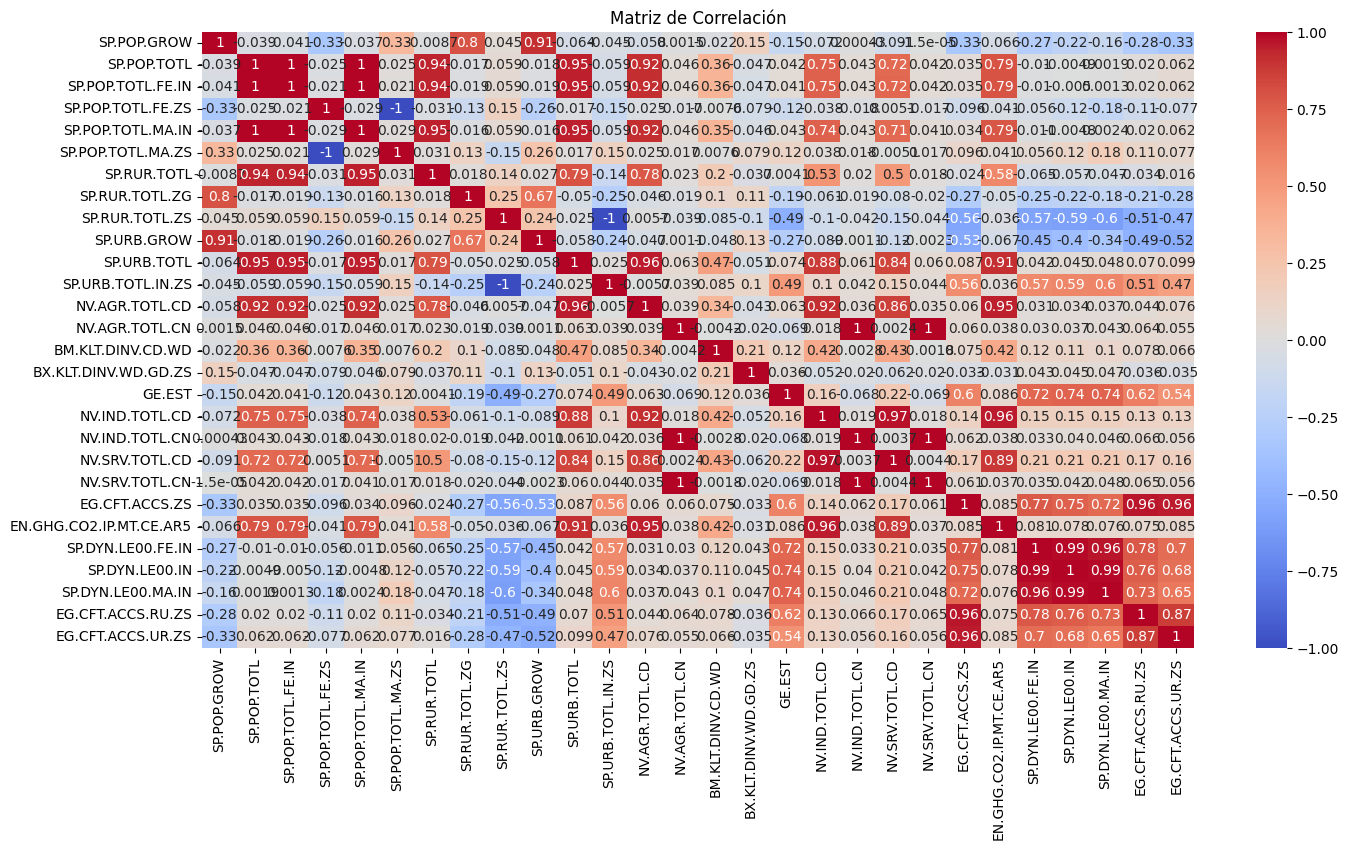

In [24]:
corr = X_std.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

##PCA usando sklearn

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_std)

pca.explained_variance_ratio_

array([2.94880454e-01, 2.46351029e-01, 1.07692554e-01, 1.02728700e-01,
       5.25839187e-02, 4.40034491e-02, 3.62649271e-02, 3.35705754e-02,
       2.70104971e-02, 2.16696089e-02, 1.33371601e-02, 8.12738452e-03,
       4.03116754e-03, 3.77950743e-03, 1.33172815e-03, 9.77093918e-04,
       7.94335346e-04, 4.01991414e-04, 2.59493664e-04, 1.71333397e-04,
       2.39243444e-05, 4.25723777e-06, 3.12274649e-06, 1.78612296e-06,
       9.99752347e-31, 5.81549155e-32, 1.48422300e-33, 1.48422300e-33])

In [26]:
np.sum([3.32937609e-01, 2.03904734e-01, 1.20518288e-01, 1.14352585e-01])

np.float64(0.771713216)

In [27]:
#Seleccionar 5 componentes
pca_5 = PCA(n_components=5)
X_std_pca = pca_5.fit_transform(X_std)

X_std_pca = pd.DataFrame(X_std_pca, columns=['CP1', 'CP2', 'CP3', 'CP4', 'CP5'])
X_std_pca.head()


,CP1,CP2,CP3,CP4,CP5
0,-2.057187,-3.058355,-0.206003,-0.897053,0.342623
1,-2.180929,-3.302239,0.106903,0.649800,0.694844
2,-1.139881,-0.763885,0.116148,0.353266,0.264700
3,1.028352,-0.051198,1.130773,-1.031000,-0.281571
4,-1.679872,-2.403339,0.157843,0.399965,0.040285


In [28]:
# Matriz de correlación de las componentes
X_std_pca.corr()

,CP1,CP2,CP3,CP4,CP5
CP1,1.000000e+00,-3.863582e-17,-4.877092e-17,-4.554513e-17,-5.294164e-16
CP2,-3.863582e-17,1.000000e+00,-1.763671e-16,-6.260273e-17,2.533645e-17
CP3,-4.877092e-17,-1.763671e-16,1.000000e+00,-1.905926e-16,4.749303e-16
CP4,-4.554513e-17,-6.260273e-17,-1.905926e-16,1.000000e+00,-3.675033e-16
CP5,-5.294164e-16,2.533645e-17,4.749303e-16,-3.675033e-16,1.000000e+00


In [29]:
X_std_pca

,CP1,CP2,CP3,CP4,CP5
0,-2.057187,-3.058355,-0.206003,-0.897053,0.342623
1,-2.180929,-3.302239,0.106903,0.649800,0.694844
2,-1.139881,-0.763885,0.116148,0.353266,0.264700
3,1.028352,-0.051198,1.130773,-1.031000,-0.281571
4,-1.679872,-2.403339,0.157843,0.399965,0.040285
...,...,...,...,...,...
193,-1.365911,-2.236386,0.187692,0.611214,0.372858
194,0.815581,3.370769,0.009725,1.361353,0.550638
195,0.571716,1.157244,0.047238,0.484425,-0.441990
196,0.275871,2.097788,-0.676004,-1.740998,-0.793175


#Modelos de clasificación con PCA
##SVM

In [33]:
y_clase = pd.qcut(paises_wb['NY.GDP.MKTP.PP.KD'], q=3, labels=[0, 1, 2], duplicates='drop')
X = X_std_pca
y = y_clase

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test =train_test_split(X_std_pca, y,
                                                   test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)
svc = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

report_svc_PCA = classification_report(
    y_test,
    y_pred_svc,
    output_dict=True
)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svc))


              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.44      0.62      0.52        13
           2       0.89      0.62      0.73        13

    accuracy                           0.60        40
   macro avg       0.65      0.60      0.61        40
weighted avg       0.65      0.60      0.61        40



##Regresión Logistica

In [42]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)

report_logit_PCA = classification_report(
    y_test,
    y_pred_logit,
    output_dict=True
)


In [43]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        14
           1       0.54      0.54      0.54        13
           2       1.00      0.77      0.87        13

    accuracy                           0.70        40
   macro avg       0.73      0.70      0.71        40
weighted avg       0.73      0.70      0.71        40



#Modelos de clasificacion sin PCA
##SVM

In [44]:
y_clase = pd.qcut(paises_wb['NY.GDP.MKTP.PP.KD'], q=3, labels=[0, 1, 2], duplicates='drop')
y = y_clase

In [45]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [46]:
# Variables explicativas: todas menos el PIB
X = paises_wb.drop(columns=['NY.GDP.MKTP.PP.KD'])


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

svm_sin_pca = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

svm_sin_pca.fit(X_train_std, y_train)


SVC(random_state=42)

In [49]:
y_pred = svm_sin_pca.predict(X_test_std)


In [50]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)


Matriz de confusión:
 [[11  7  2]
 [ 3 15  2]
 [ 0  3 17]]


In [51]:
from sklearn.metrics import classification_report

print("Reporte de clasificación:\n",
      classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.79      0.55      0.65        20
           1       0.60      0.75      0.67        20
           2       0.81      0.85      0.83        20

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.71        60
weighted avg       0.73      0.72      0.71        60



In [52]:
report_svc = classification_report(y_test, y_pred, output_dict=True)

##Regresion logistica

In [53]:
# Variables explicativas (sin PCA)
X = paises_wb.drop(columns=['NY.GDP.MKTP.PP.KD'])


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [56]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

logit_model.fit(X_train_std, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [57]:
y_pred = logit_model.predict(X_test_std)
y_pred_proba = logit_model.predict_proba(X_test_std)[:, 1]


In [58]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)


Matriz de confusión:
 [[14  6  0]
 [ 7 12  1]
 [ 0  6 14]]


In [59]:
from sklearn.metrics import classification_report

print("Reporte de clasificación:\n",
      classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.50      0.60      0.55        20
           2       0.93      0.70      0.80        20

    accuracy                           0.67        60
   macro avg       0.70      0.67      0.68        60
weighted avg       0.70      0.67      0.68        60



In [60]:
report_logit = classification_report(y_test, y_pred, output_dict=True)

#Comparación

In [61]:
df_svc_pca = pd.DataFrame(report_svc_PCA).T
df_logit_pca = pd.DataFrame(report_logit_PCA).T
df_svc = pd.DataFrame(report_svc).T
df_logit = pd.DataFrame(report_logit).T

In [62]:
comparacion_PCA = pd.concat(
    [
        df_svc_pca[['precision', 'recall', 'f1-score']],
        df_logit_pca[['precision', 'recall', 'f1-score']]
    ],
    axis=1,
    keys=['SVC', 'Logit']
)

comparacion_PCA


SVC                         Logit                    
             precision    recall  f1-score precision    recall  f1-score
0             0.615385  0.571429  0.592593  0.647059  0.785714  0.709677
1             0.444444  0.615385  0.516129  0.538462  0.538462  0.538462
2             0.888889  0.615385  0.727273  1.000000  0.769231  0.869565
accuracy      0.600000  0.600000  0.600000  0.700000  0.700000  0.700000
macro avg     0.649573  0.600733  0.611998  0.728507  0.697802  0.705901
weighted avg  0.648718  0.600000  0.611513  0.726471  0.700000  0.705996

In [63]:
comparacion = pd.concat(
    [
        df_svc[['precision', 'recall', 'f1-score']],
        df_logit[['precision', 'recall', 'f1-score']]
    ],
    axis=1,
    keys=['SVC', 'Logit']
)

comparacion

SVC                         Logit                    
             precision    recall  f1-score precision    recall  f1-score
0             0.785714  0.550000  0.647059  0.666667  0.700000  0.682927
1             0.600000  0.750000  0.666667  0.500000  0.600000  0.545455
2             0.809524  0.850000  0.829268  0.933333  0.700000  0.800000
accuracy      0.716667  0.716667  0.716667  0.666667  0.666667  0.666667
macro avg     0.731746  0.716667  0.714331  0.700000  0.666667  0.676127
weighted avg  0.731746  0.716667  0.714331  0.700000  0.666667  0.676127

#Conclusion
El modelo SVC sin PCA es mejor que el con PCA, mientras que el modelo logit es ligeramente superior al modelo sin PCA